In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [9]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [10]:
df['Rating']=df['Rating'].apply(ratings)

TypeError: '>' not supported between instances of 'str' and 'int'

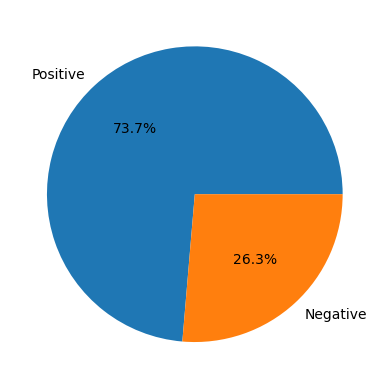

In [11]:
plt.pie(df['Rating'].value_counts(),
       labels=df['Rating'].unique().tolist(),
       autopct='%1.1f%%')
plt.show()

In [12]:
length=len(df['Review'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 593


In [13]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [14]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')


Word count in a sample review: 87


In [15]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [16]:
df['Word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [17]:
df['mean_word_length']=df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [18]:
import re
from nltk.corpus import stopwords
def clean(review):
    review=review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review="".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Kannedari
[nltk_data]     Nandini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df['Review']=df['Review'][:100].apply(clean)
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nicehotelexpensiveparkinggotgooddealstayhotela...,Positive,593,87,5.804598
1,oknothingspecialchargediamondmemberhiltondecid...,Negative,1689,250,5.752000
2,nicerooms4experiencehotelmonacoseattlegoodhote...,Negative,1427,217,5.571429
3,uniquegreatstaywonderfultimehotelmonacolocatio...,Positive,600,89,5.730337
4,greatstaygreatstaywentseahawkgameawesomedownfa...,Positive,1281,191,5.701571


In [22]:
df['Review'][0]

'nicehotelexpensiveparkinggotgooddealstayhotelanniversaryarrivedlateeveningtookadvicepreviousreviewsvaletparkingcheckquickeasylittledisappointednon-existentviewroomroomcleannicesizebedcomfortablewokestiffneckhighpillowssoundprooflikeheardmusicroomnightmorningloudbangsdoorsopeningclosinghearpeopletalkinghallwaymaybenoisyneighborsavedabathproductsnicegoldfishstaynicetouchtakenadvantagestayinglongerlocationgreatwalkingdistanceshoppingoverallniceexperiencepay40parkingnight'

In [25]:
from tqdm import trange

# Replace NaN values with an empty string
df['Review'] = df['Review'].fillna('')

# Convert the 'Review' column to strings
df['Review'] = df['Review'].astype(str)

corpus = ""
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review'][i]  # Concatenate reviews into the corpus

print(len(corpus))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 175568.42it/s]

50326


In [28]:
words= []
freq= []
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

NameError: name 'mostCommon' is not defined

In [29]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 most Frequently Occuring words')
plt.show()

C:\Users\Kannedari Nandini\anaconda3\lib\site-packages\seaborn\categorical.py:250: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


ValueError: min() arg is an empty sequence